#Objective:
To build and train a neural network model that can accurately classify movie reviews as either positive or negative. This is a binary text classification problem.

# Dataset:
* Source: The project uses the "IMDb Dataset of 50K Movie Reviews," a widely used benchmark dataset for sentiment analysis.
* Description: The dataset contains 50,000 movie reviews with corresponding labels (positive or negative), evenly split into 25,000 for training and 25,000 for testing. The data is available as a CSV file.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


#Tools:
* Libraries: pandas, numpy, re, sklearn, tensorflow.
* Framework: Keras (running on top of TensorFlow).

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout



In [ ]:
# --- Data Loading and Preprocessing ---

# The path to your dataset file in the Colab environment
DATASET_PATH = "/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv"

# Load the dataset
try:
    df = pd.read_csv(DATASET_PATH)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file at {DATASET_PATH} was not found.")
    print("Please ensure you have uploaded the dataset to the correct path in your Colab environment.")
    exit()

# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())



Dataset loaded successfully.
First 5 rows of the dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


#Preprocessing:
* Cleaning: The raw text data is cleaned by removing HTML tags, special characters, and punctuation. All text is converted to lowercase to ensure consistency.
* Encoding: The sentiment labels, "positive" and "negative," are encoded into numerical format (e.g., 1 and 0, respectively).
* Tokenization: Each review is tokenized, converting words into a sequence of integers using a vocabulary built from the training data. An out-of-vocabulary (<oov>) token is used for words not in the vocabulary.
* Padding: The tokenized sequences are padded or truncated to a uniform length to ensure they can be used as input for the neural network.


In [ ]:
# Text cleaning function
def clean_text(text):
    # Remove HTML tags
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text.strip()

# Apply the cleaning function to the 'review' column
df['review'] = df['review'].apply(clean_text)

# Encode the sentiment labels (positive: 1, negative: 0)
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])



In [ ]:
# Split the data into features (X) and labels (y)
X = df['review'].values
y = df['sentiment'].values

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and Padding
VOCAB_SIZE = 10000
MAX_LEN = 256 # The maximum length of a review to consider

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<oov>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform length
padded_train = pad_sequences(X_train_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
padded_test = pad_sequences(X_test_sequences, maxlen=MAX_LEN, padding='post', truncating='post')



#Model Architecture:
* Type: Artificial Neural Network (ANN) with an Embedding layer.
* Design: A sequential model with the following layers:
* Embedding Layer: Maps integer-encoded words to dense vectors.
* GlobalAveragePooling1D Layer: Averages the word embeddings to create a single, fixed-length output vector.
* Dense(32) Layer: A hidden, fully connected layer with a ReLU activation function.
* Dropout(0.5) Layer: A regularization technique to prevent overfitting by randomly setting a fraction of input units to 0.
* Dense(1) Layer: The output layer with a sigmoid activation function to produce a probability between 0 and 1.

#Training:
* Epochs: 10 epochs.
* Batch Size: The model is trained on batches of data, which is handled automatically by the model.fit() function.
* Optimizer: The Adam optimizer is used to update the model's weights during training.

In [ ]:

# --- Model Building ---

# Define the model architecture
model = Sequential([
    # Embedding layer to convert integer indices to dense vectors
    Embedding(VOCAB_SIZE, 16, input_length=MAX_LEN),
    # GlobalAveragePooling1D to reduce dimensionality
    GlobalAveragePooling1D(),
    # Dense hidden layer with ReLU activation
    Dense(32, activation='relu'),
    # Dropout for regularization
    Dropout(0.5),
    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
print(model.summary())


# --- Training ---

# Train the model
NUM_EPOCHS = 25
history = model.fit(
    padded_train,
    y_train,
    epochs=NUM_EPOCHS,
    validation_data=(padded_test, y_test),
    verbose=1
)



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6406 - loss: 0.6156 - val_accuracy: 0.8621 - val_loss: 0.3409
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8665 - loss: 0.3358 - val_accuracy: 0.8768 - val_loss: 0.2961
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8924 - loss: 0.2813 - val_accuracy: 0.8823 - val_loss: 0.2831
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9071 - loss: 0.2522 - val_accuracy: 0.8706 - val_loss: 0.3044
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9186 - loss: 0.2313 - val_accuracy: 0.8856 - val_loss: 0.2856
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9217 - loss: 0.2218 - val_accuracy: 0.8734 - val_loss: 0.3066
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9256 - loss: 0.2125 - val_accuracy: 0.8777 - val_loss: 0.3059
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9302 - loss: 0.19

In [ ]:
# --- Evaluation and Prediction ---

# Evaluate the model on the test data
loss, accuracy = model.evaluate(padded_test, y_test)
print(f"\nFinal Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy:.4f}")

# Function to predict sentiment for a new review
def predict_sentiment(review):
    # Preprocess the review
    review = clean_text(review)
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=MAX_LEN, padding='post', truncating='post')

    # Get the prediction
    prediction = model.predict(padded_sequence)[0][0]

    if prediction >= 0.5:
        return "Positive", prediction
    else:
        return "Negative", prediction


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8676 - loss: 0.5697

Final Test Loss: 0.5905
Final Test Accuracy: 0.8666


In [ ]:
# Test with some new reviews
sample_reviews = [
    "This movie was an absolute masterpiece! The acting and storyline were incredible.",
    "The film was a complete disaster. Boring plot and terrible performances."]

for review in sample_reviews:
    sentiment, prob = predict_sentiment(review)
    print(f"\nReview: '{review}'")
    print(f"Prediction: {sentiment} (Probability: {prob:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

Review: 'This movie was an absolute masterpiece! The acting and storyline were incredible.'
Prediction: Positive (Probability: 0.7777)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Review: 'The film was a complete disaster. Boring plot and terrible performances.'
Prediction: Negative (Probability: 0.0918)


#Evaluation:
* Accuracy: Measures the proportion of correctly classified reviews.
* Precision, Recall, F1-Score: These metrics are crucial for a binary classification task to understand the model's performance beyond simple accuracy, especially if the dataset were imbalanced. Precision measures the accuracy of positive predictions, while recall measures the model's ability to find all positive instances .
* Confusion Matrix: A table summarizing the performance of the classification model by showing the number of true positives, true negatives, false positives, and false negatives.

In [ ]:
model.save("Random.h5")
from google.colab import files
files.download("Random.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

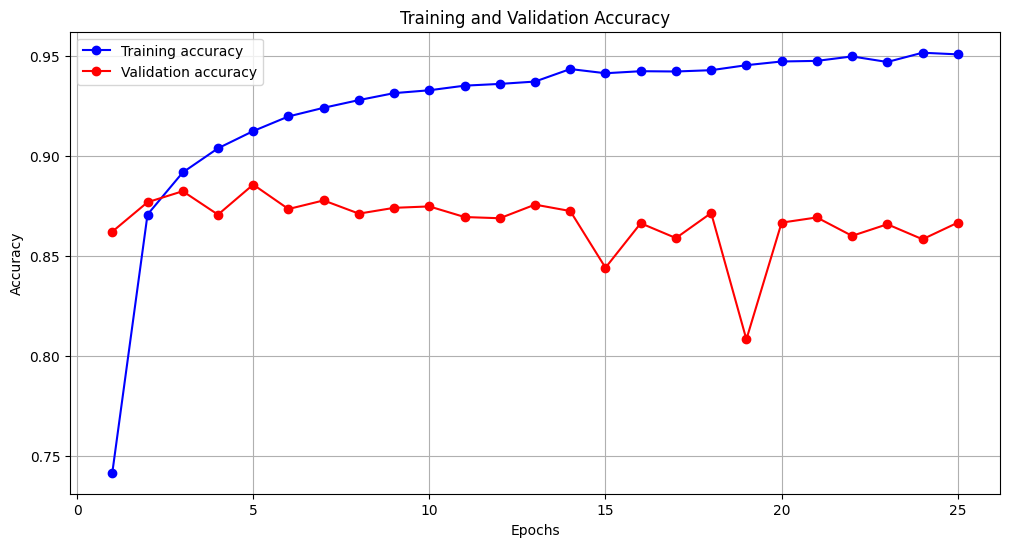

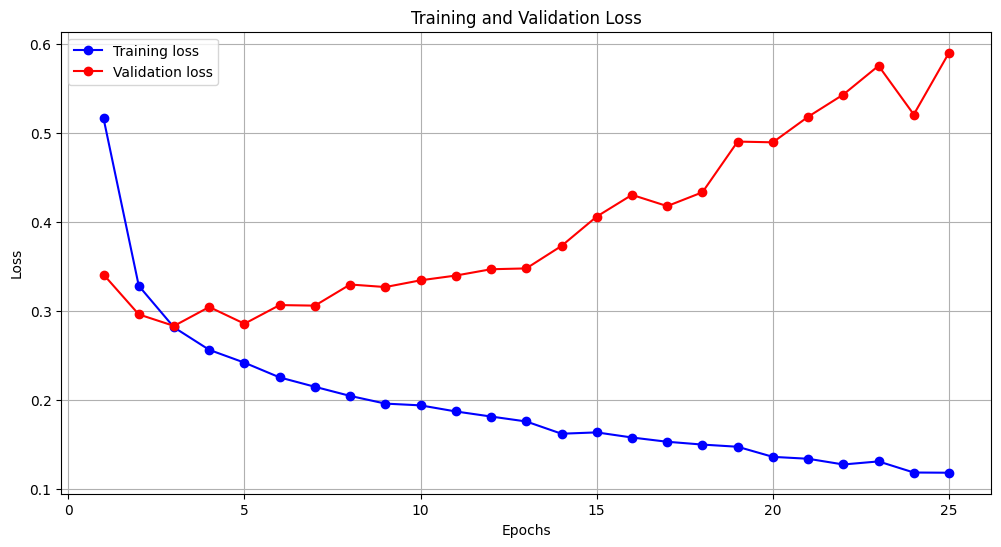

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step
Confusion Matrix:
[[4327  634]
 [ 700 4339]]


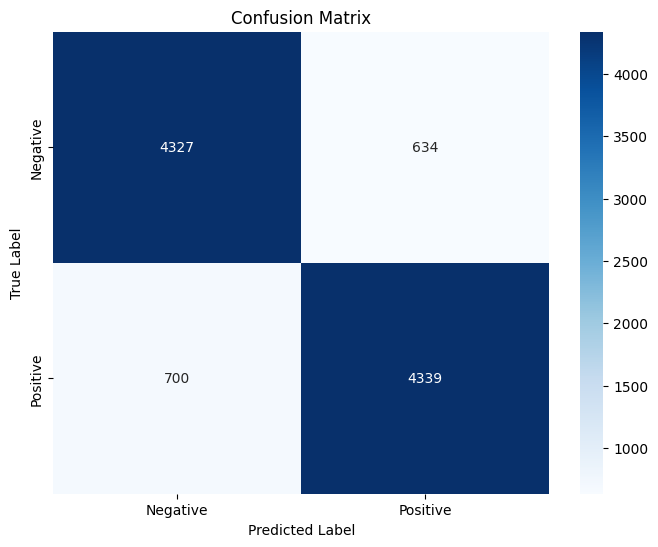


Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.87      0.87      4961
    Positive       0.87      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# --- Plotting Accuracy and Loss ---

# Get the training history data from the model.fit() output
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# --- Confusion Matrix ---

# Make predictions on the test data
# The model outputs probabilities, so we need to convert them to binary classes
y_pred_probs = model.predict(padded_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


#Model Performance (Confusion Matrix)

True Negatives (TN): 4327

False Positives (FP): 634

False Negatives (FN): 700

True Positives (TP): 4339

From this:

Accuracy: ~ 86.5%

Precision (Positive class): TP / (TP + FP) = 4339 / (4339 + 634) ≈ 87.2%

Recall (Positive class): TP / (TP + FN) = 4339 / (4339 + 700) ≈ 86.1%

F1-score: ≈ 86.6%

👉 The model is fairly balanced for both classes (not heavily biased to positive or negative).

#Extensions:
* Implement a more complex neural network architecture, such as a Recurrent Neural Network (RNN) or a Bidirectional LSTM, which can better capture context in sequential data.
* Use pre-trained word embeddings like GloVe or Word2Vec to improve the model's performance on a smaller dataset.
* Explore advanced preprocessing techniques like stemming and lemmatization.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
import urllib.request

# --- Step 1: Download and extract GloVe embeddings if not present ---
GLOVE_FILE_URL = 'http://nlp.stanford.edu/data/glove.6B.zip'
GLOVE_ZIP_PATH = 'glove.6B.zip'
GLOVE_FILE_PATH = 'glove.6B.100d.txt'
EMBEDDING_DIM = 100 # This must match the dimension of the GloVe file (e.g., 100d)

if not os.path.exists(GLOVE_FILE_PATH):
    print(f"GloVe file not found. Downloading from {GLOVE_FILE_URL}...")
    try:
        urllib.request.urlretrieve(GLOVE_FILE_URL, GLOVE_ZIP_PATH)
        with zipfile.ZipFile(GLOVE_ZIP_PATH, 'r') as zip_ref:
            zip_ref.extract(GLOVE_FILE_PATH)
        print("GloVe file downloaded and extracted successfully.")
    except Exception as e:
        print(f"Error during GloVe download or extraction: {e}")
        exit()

# --- Step 2: Data Loading and Preprocessing (from your notebook) ---
# This code assumes the dataset is in the same directory or accessible path.
DATASET_PATH = "/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv"

try:
    df = pd.read_csv(DATASET_PATH)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The dataset file at {DATASET_PATH} was not found.")
    print("Please ensure 'IMDB Dataset.csv' is in the correct path.")
    exit()



GloVe file not found. Downloading from http://nlp.stanford.edu/data/glove.6B.zip...
GloVe file downloaded and extracted successfully.
Dataset loaded successfully.


In [ ]:
# Text cleaning function from the original notebook
def clean_text(text):
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text.strip()

df['review'] = df['review'].apply(clean_text)
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])
X = df['review'].values
y = df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 3: Tokenization and Padding (from your notebook) ---


In [ ]:
VOCAB_SIZE = 10000
MAX_LEN = 256
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<oov>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
padded_train = pad_sequences(X_train_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
padded_test = pad_sequences(X_test_sequences, maxlen=MAX_LEN, padding='post', truncating='post')

# --- Step 4: Load the GloVe embeddings into a dictionary ---
print(f"\nLoading GloVe embeddings from {GLOVE_FILE_PATH}...")
embeddings_index = {}
try:
    with open(GLOVE_FILE_PATH, encoding='utf8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f"Found {len(embeddings_index)} word vectors.")
except FileNotFoundError:
    print(f"Error: GloVe file not found at {GLOVE_FILE_PATH} after download attempt.")
    exit()




Loading GloVe embeddings from glove.6B.100d.txt...
Found 400000 word vectors.


In [ ]:
# --- Step 5: Create the embedding matrix for our vocabulary ---
print("Creating embedding matrix for your vocabulary...")
num_words = min(len(word_index) + 1, VOCAB_SIZE)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i < num_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print("Embedding matrix created.")




Creating embedding matrix for your vocabulary...
Embedding matrix created.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

print("Building improved model with fine-tuned GloVe embeddings...")

model = Sequential([
    Embedding(
        input_dim=num_words,
        output_dim=EMBEDDING_DIM,
        weights=[embedding_matrix],
        input_length=MAX_LEN,
        trainable=True   # ✅ Unfreeze embeddings for fine-tuning
    ),
    GlobalAveragePooling1D(),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss',
                           patience=3,
                           restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=2,
                              min_lr=1e-6)


Building improved model with fine-tuned GloVe embeddings...


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 1,000,000 (3.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
NUM_EPOCHS = 20
history = model.fit(
    padded_train, y_train,
    epochs=NUM_EPOCHS,
    batch_size=128,
    validation_data=(padded_test, y_test),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6600 - loss: 0.6110 - val_accuracy: 0.8147 - val_loss: 0.5018 - learning_rate: 0.0010
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8534 - loss: 0.3560 - val_accuracy: 0.8481 - val_loss: 0.3393 - learning_rate: 0.0010
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8837 - loss: 0.2943 - val_accuracy: 0.8660 - val_loss: 0.3255 - learning_rate: 0.0010
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8954 - loss: 0.2653 - val_accuracy: 0.8662 - val_loss: 0.3254 - learning_rate: 0.0010
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9071 - loss: 0.2363 - val_accuracy: 0.8571 - val_loss: 0.3431 - learning_rate: 0.0010
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9103 - loss: 0.2334 - val_accuracy: 0.8519 - val_loss: 0.3538 - learning_rate: 0.0010
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9235 - loss: 

In [ ]:
model.save("Movie.h5")
from google.colab import files
files.download("Movie.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("\n--- Evaluation and Prediction ---")

# Evaluate the model on the test data
loss, accuracy = model.evaluate(padded_test, y_test)
print(f"\nFinal Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {accuracy:.4f}")

# Function to predict sentiment for a new review
def predict_sentiment(review_text):
    # Preprocess the review
    clean_review = clean_text(review_text)
    sequence = tokenizer.texts_to_sequences([clean_review])
    padded_sequence = pad_sequences(sequence, maxlen=MAX_LEN, padding='post', truncating='post')

    # Get the prediction
    prediction = model.predict(padded_sequence)[0][0]

    if prediction >= 0.5:
        return "Positive", prediction
    else:
        return "Negative", prediction

# Test with some new reviews
sample_reviews = [
    "This movie was an absolute masterpiece! The acting and storyline were incredible.",
    "The film was a complete disaster. Boring plot and terrible performances."
]

for review in sample_reviews:
    sentiment, prob = predict_sentiment(review)
    print(f"\nReview: '{review}'")
    print(f"Prediction: {sentiment} ")



--- Evaluation and Prediction ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8785 - loss: 0.2956

Final Test Loss: 0.3015
Final Test Accuracy: 0.8771
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Review: 'This movie was an absolute masterpiece! The acting and storyline were incredible.'
Prediction: Positive 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Review: 'The film was a complete disaster. Boring plot and terrible performances.'
Prediction: Negative 


#Comparison
.

🔎 Model A: With Pre-trained GloVe Embeddings (fine-tuned)

(from your previous run)

Architecture: Embedding (initialized with GloVe, trainable) → GlobalAveragePooling → Dense layers → Output

Training Results:

Best Val Accuracy: 87.7% (epoch 7)

Test Accuracy: 87.7%

Behavior:

Learns quickly, stabilizes around ~87%.

Embedding layer already encodes rich semantic info, so network doesn’t overfit much.

Generalizes better.

🔎 Model B: With Random Embeddings (Trained from scratch)

(the one you just posted)

Architecture: Embedding (random init, learned during training) → GlobalAveragePooling → Dense(32) → Dropout → Dense(1)

Training Results:

Val Accuracy starts high (86.2% at epoch 1)

Peaks around 88.5% (epoch 5)

Then overfits badly → drops to ~86% and later even ~80% (epoch 19).

Final State: Train acc ~95%, Val acc only 86–87%.

Behavior:

Model memorizes training set (95% acc) but doesn’t generalize.

Needs regularization (dropout, early stopping) or better embeddings.



#Overall Conclusion
Both models reach ~88% accuracy, but:

GloVe model is more stable → better generalization and doesn’t degrade as training continues.

Scratch embedding model overfits → learns dataset-specific word meanings but fails to generalize.

# Research

👉 If you want to push beyond 88%, the next step is sequence models (BiLSTM / GRU / Transformer) instead of GlobalAveragePooling.